In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
def Data_Cleaning(Data_set):

    All_players_dataSet = Data_set.copy()

    All_players_dataSet = All_players_dataSet.drop(columns=All_players_dataSet.columns[All_players_dataSet.columns.str.contains('Unnamed:')])
    All_players_dataSet.reset_index(drop=True, inplace=True)
    
    All_players_dataSet.fillna(0, inplace=True)
    All_players_dataSet.replace('', 0, inplace=True)
    All_players_dataSet.replace('--', 0, inplace=True)
    
    # check if any NaN,empty Strings exists in the dataframe
    any_missing_values = All_players_dataSet.isna().any().any()
    any_empty_values = (All_players_dataSet.applymap(lambda x: x == '')).any().any()
    if any_missing_values or any_empty_values:
        print("DataFrame contains missing values or empty strings/spaces.")
    else:
        print("DataFrame does not contain missing values or empty strings/spaces.")

    # Drop unwanted columns
    columns_to_drop = ['First_votes','Max_points', 'Tm', 'Lg', 'Pos', 'Arena_misc',
                   'Attendance_misc','FG', 'FGA', 'FG%', '3P', '3PA',
                   '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'AST',
                   'PTS', 'FG_100_poss', 'FGA_100_poss', 'FG%_100_poss',
                   '3P_100_poss', '3PA_100_poss', '3P%_100_poss', '2P_100_poss', '2PA_100_poss',
                   '2P%_100_poss', 'FT_100_poss', 'FTA_100_poss', 'FT%_100_poss', 'ORB_100_poss', 'AST_100_poss',
                   'PTS_100_poss', 'ORtg_100_poss', '3PAr_advanced', 'FTr_advanced', 'ORB%_advanced',
                   'OWS_advanced', 'OBPM_advanced', 'AST%_advanced', 'USG%_advanced', 'G_team', 'MP_team', 'FG_team', 'FGA_team',
                   'FG%_team', '3P_team', '3PA_team', '3P%_team', '2P_team', '2PA_team', '2P%_team',
                   'FT_team', 'FTA_team', 'FT%_team', 'ORB_team', 'G_opponent', 'MP_opponent',
                   'FG_opponent', 'STL_opponent', 'BLK_opponent','DRB_opponent', 'TOV_opponent', 'PF_opponent',
                   'PTS_opponent', 'ORtg_misc', 'FTr_misc', '3PAr_misc', 'eFG%_misc', 'ORB%_misc',
                   'FT/FGA_misc', 'eFG%.1_misc', 'FT/FGA.1_misc', 'ORPM_espn', 'raptor_offense_raptor',
                   'war_playoffs_raptor', 'predator_offense_raptor','FTr_misc','FT/FGA.1_misc','BLK_opponent',
                   '3P_team','FT/FGA.1_misc', 'PTS_team','TS%_advanced','L_nba','TOV%_advanced']

    All_players_dataSet['won_dpoy_last_season'] = All_players_dataSet['won_dpoy_last_season'].astype(int)
    
    ## Drop the specified columns
    All_players_dataSet.drop(columns=columns_to_drop, inplace=True)
    
    ## seperating our dataFrame
    #Y = All_players_dataSet['Points_won']  # Target
    #X = All_players_dataSet.drop('Points_won', axis=1)  # Features

    return All_players_dataSet

In [39]:
## All players dataFrame
all_players_w_add_sorted = pd.read_csv("all_players_w_add_sorted.csv")
all_players_w_add_sorted = Data_Cleaning(all_players_w_add_sorted)

C:\Users\Abdou\AppData\Local\Temp\ipykernel_22336\3919004485.py:2: DtypeWarning: Columns (154,155) have mixed types. Specify dtype option on import or set low_memory=False.
  all_players_w_add_sorted = pd.read_csv("all_players_w_add_sorted.csv")


DataFrame does not contain missing values or empty strings/spaces.


In [40]:
display(all_players_w_add_sorted.head(10))

,Season,Year,Player_name,Rank,Dpoy_titles,Dpoy_votes,won_dpoy_last_season,teamates_with_dpoy,Points_won,Age,...,STL_nba,STL%_nba,BLK_nba,%BLK_nba,OPP PTS OFF TOV_nba,OPP PTS 2ND CHANCE_nba,OPP PTS FB_nba,OPP PTS PAINT_nba,DEF WS_nba,D-LEBRON_bball
0,2022-23,2023.0,Ivica Zubac,-1.0,0.0,0.0,0,0.0,0.0,25.0,...,0.4,9.8,1.3,50.5,10.6,7.4,9.0,29.4,0.080,2.07
1,2022-23,2023.0,Rodney McGruder,-1.0,0.0,0.0,0,0.0,0.0,31.0,...,0.5,18.4,0.0,2.4,5.4,4.6,4.6,18.5,0.039,-0.49
2,2022-23,2023.0,DeMar DeRozan,-1.0,0.0,0.0,0,1.0,0.0,33.0,...,1.1,19.0,0.5,15.3,11.2,8.6,9.5,34.6,0.129,0.59
3,2022-23,2023.0,Vernon Carey Jr.,-1.0,0.0,0.0,0,0.0,0.0,21.0,...,0.2,50.0,0.2,50.0,0.5,0.6,0.6,1.6,0.024,-0.06
4,2022-23,2023.0,D'Angelo Russell,-1.0,0.0,0.0,0,0.0,0.0,26.0,...,1.0,19.9,0.4,11.3,12.3,9.6,9.1,34.3,0.102,-0.49
5,2022-23,2023.0,D'Angelo Russell,-1.0,0.0,0.0,0,0.0,0.0,26.0,...,1.0,19.9,0.4,11.3,12.3,9.6,9.1,34.3,0.102,-0.49
6,2022-23,2023.0,Matt Ryan,-1.0,0.0,0.0,0,0.0,0.0,25.0,...,0.1,13.9,0.0,3.4,3.7,2.9,3.1,10.0,0.036,-1.27
7,2022-23,2023.0,Matt Ryan,-1.0,0.0,0.0,0,0.0,0.0,25.0,...,0.1,13.9,0.0,3.4,3.7,2.9,3.1,10.0,0.036,-1.27
8,2022-23,2023.0,Danuel House Jr.,-1.0,0.0,0.0,0,1.0,0.0,29.0,...,0.3,10.4,0.2,10.6,5.7,4.0,3.9,15.1,0.046,-1.14
9,2022-23,2023.0,Jonas Valančiūnas,-1.0,0.0,0.0,0,0.0,0.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00


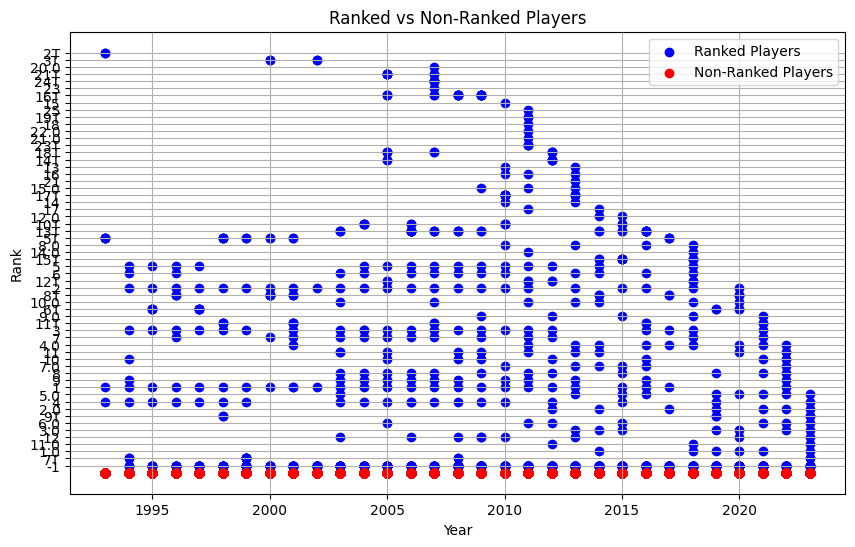

In [41]:
# Separate the ranked and non-ranked players
ranked_players = all_players_w_add_sorted[all_players_w_add_sorted['Rank'] != '-1.0']
non_ranked_players = all_players_w_add_sorted[all_players_w_add_sorted['Rank'] == '-1.0']

# Plot the data
plt.figure(figsize=(10, 6))

# Plot ranked players
plt.scatter(ranked_players['Year'], ranked_players['Rank'], color='blue', label='Ranked Players')

# Plot non-ranked players (assigning them a common plot value for visibility)
plt.scatter(non_ranked_players['Year'], [-1] * len(non_ranked_players), color='red', label='Non-Ranked Players')

# Add titles and labels
plt.title('Ranked vs Non-Ranked Players')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

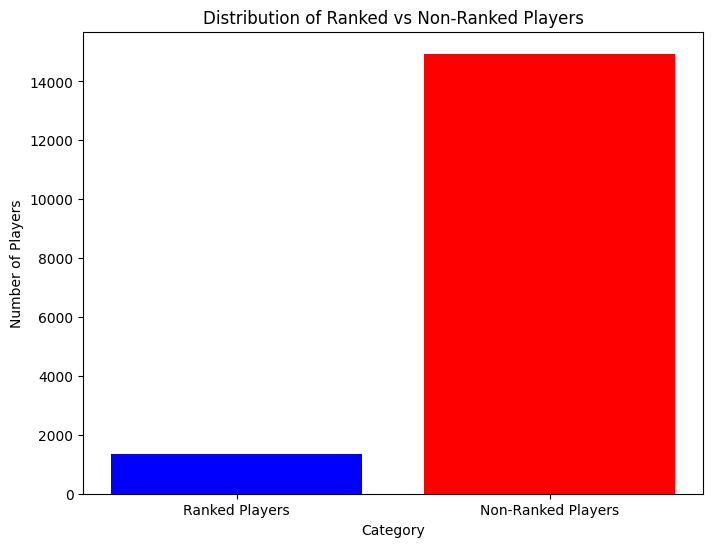

In [42]:
# Count the number of ranked and non-ranked players
ranked_count = (all_players_w_add_sorted['Rank'] != '-1.0').sum()
non_ranked_count = (all_players_w_add_sorted['Rank'] == '-1.0').sum()

# Prepare data for the bar plot
categories = ['Ranked Players', 'Non-Ranked Players']
counts = [ranked_count, non_ranked_count]

# Plot the data
plt.figure(figsize=(8, 6))

plt.bar(categories, counts, color=['blue', 'red'])

# Add titles and labels
plt.title('Distribution of Ranked vs Non-Ranked Players')
plt.xlabel('Category')
plt.ylabel('Number of Players')

# Show the plot
plt.show()

In [58]:
# Filter the data for the year 2023
data_2023 = all_players_w_add_sorted[all_players_w_add_sorted['Year'] == 2021]

# Select the players
marcus_data = data_2023[data_2023['Player_name'] == 'Marcus Smart']
frank_data = data_2023[data_2023['Player_name'] == 'Frank Jackson']

In [59]:
marcus_data_numeric = marcus_data.select_dtypes(include='number')
frank_data_numeric = frank_data.select_dtypes(include='number')

# Exclude the 'Year' column
marcus_data_numeric = marcus_data_numeric.drop(columns=['Year'])
frank_data_numeric = frank_data_numeric.drop(columns=['Year'])

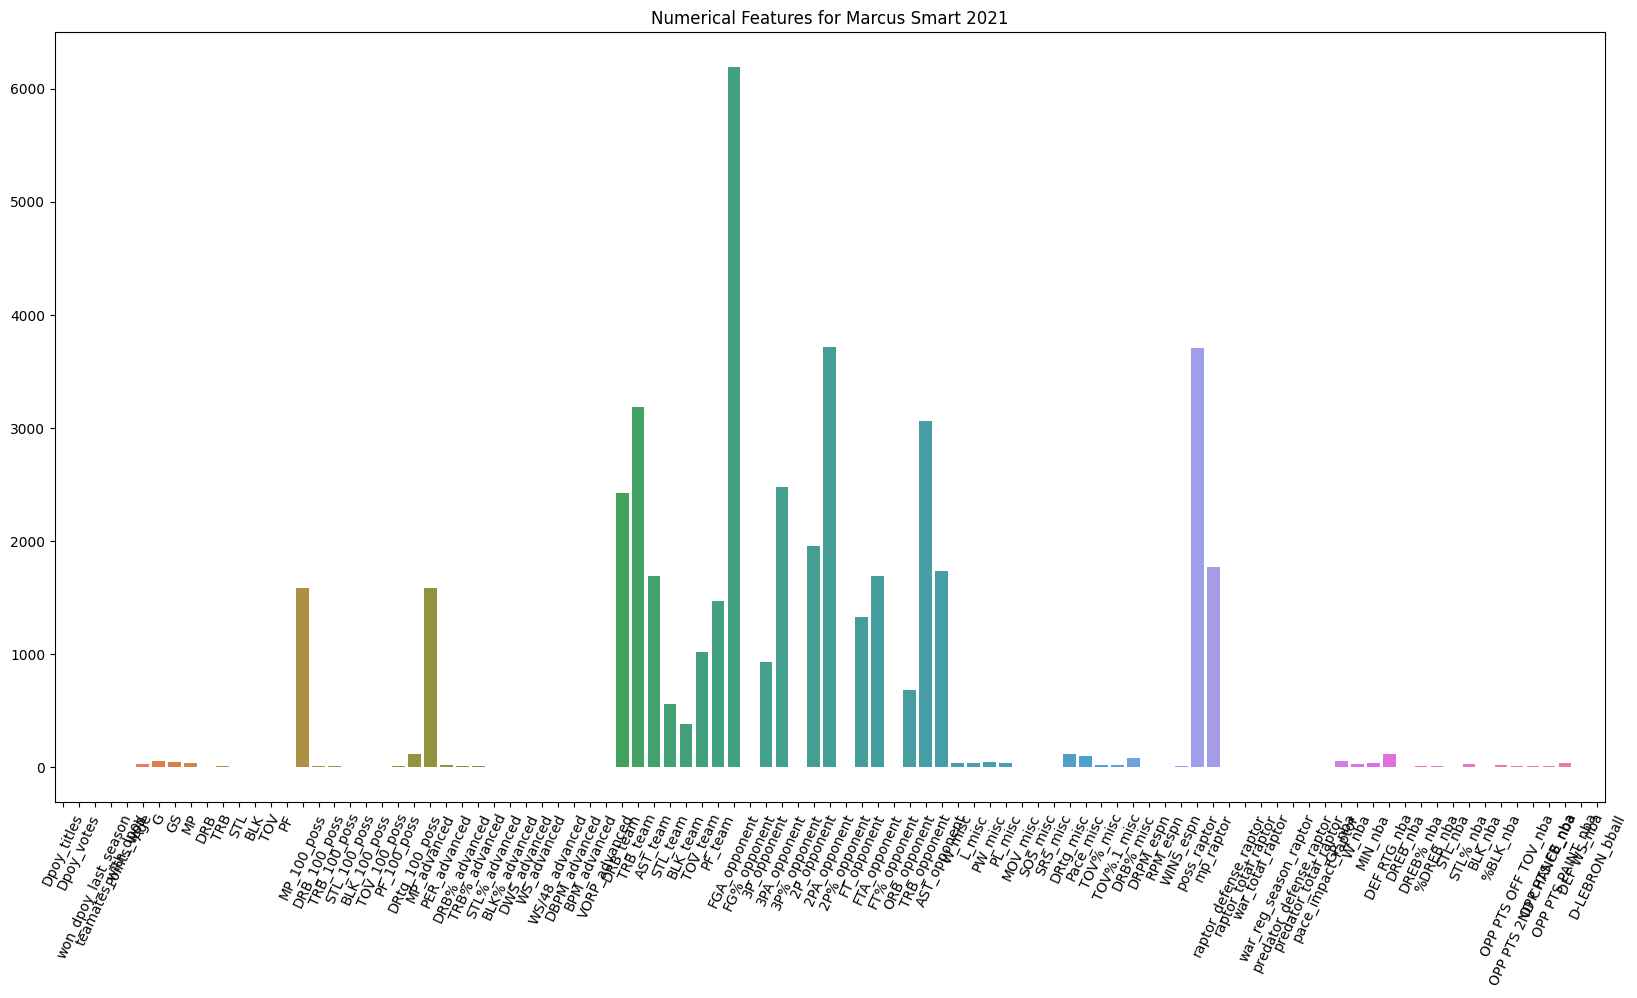

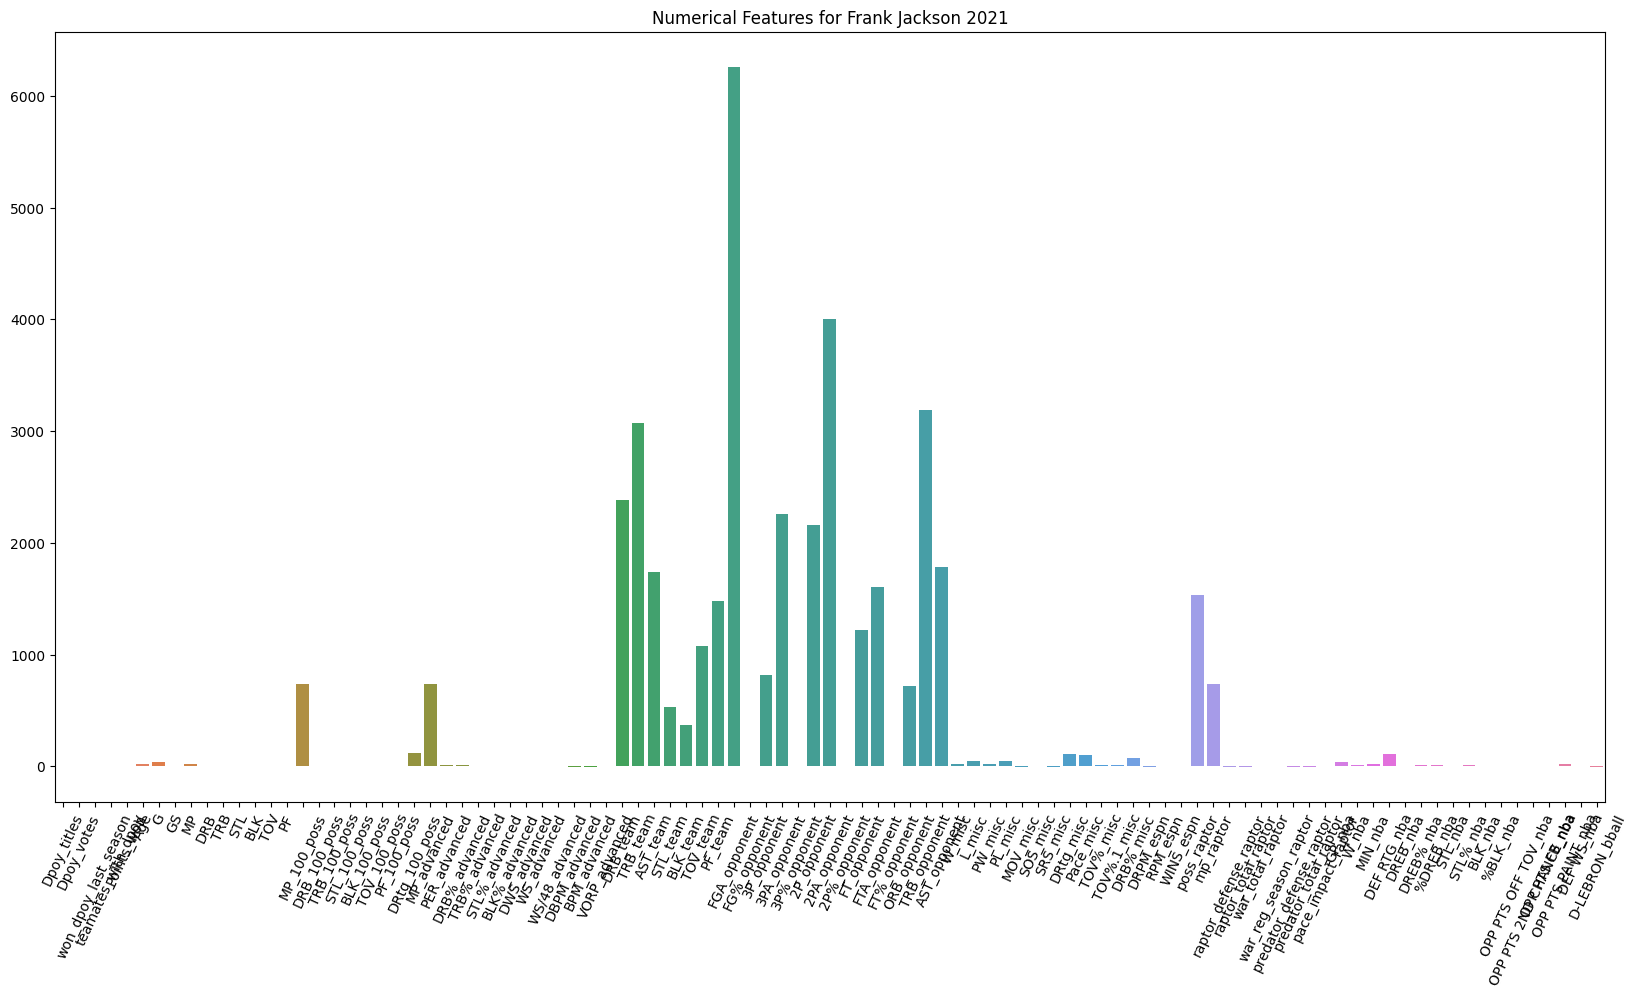

In [60]:
import seaborn as sns

# Plot all numerical features for Marcus Smart
plt.figure(figsize=(20, 10))
sns.barplot(data=marcus_data_numeric)
plt.title("Numerical Features for Marcus Smart 2021")
plt.xticks(rotation=65)
plt.show()

# Plot all numerical features for Frank Jackson
plt.figure(figsize=(20, 10))
sns.barplot(data=frank_data_numeric)
plt.title("Numerical Features for Frank Jackson 2021")
plt.xticks(rotation=65)
plt.show()

In [61]:
marcus_data_numeric_filtered = marcus_data_numeric.loc[:, (marcus_data_numeric <= 1000).all()]
frank_data_numeric_filtered = frank_data_numeric.loc[:, (frank_data_numeric <= 1000).all()]

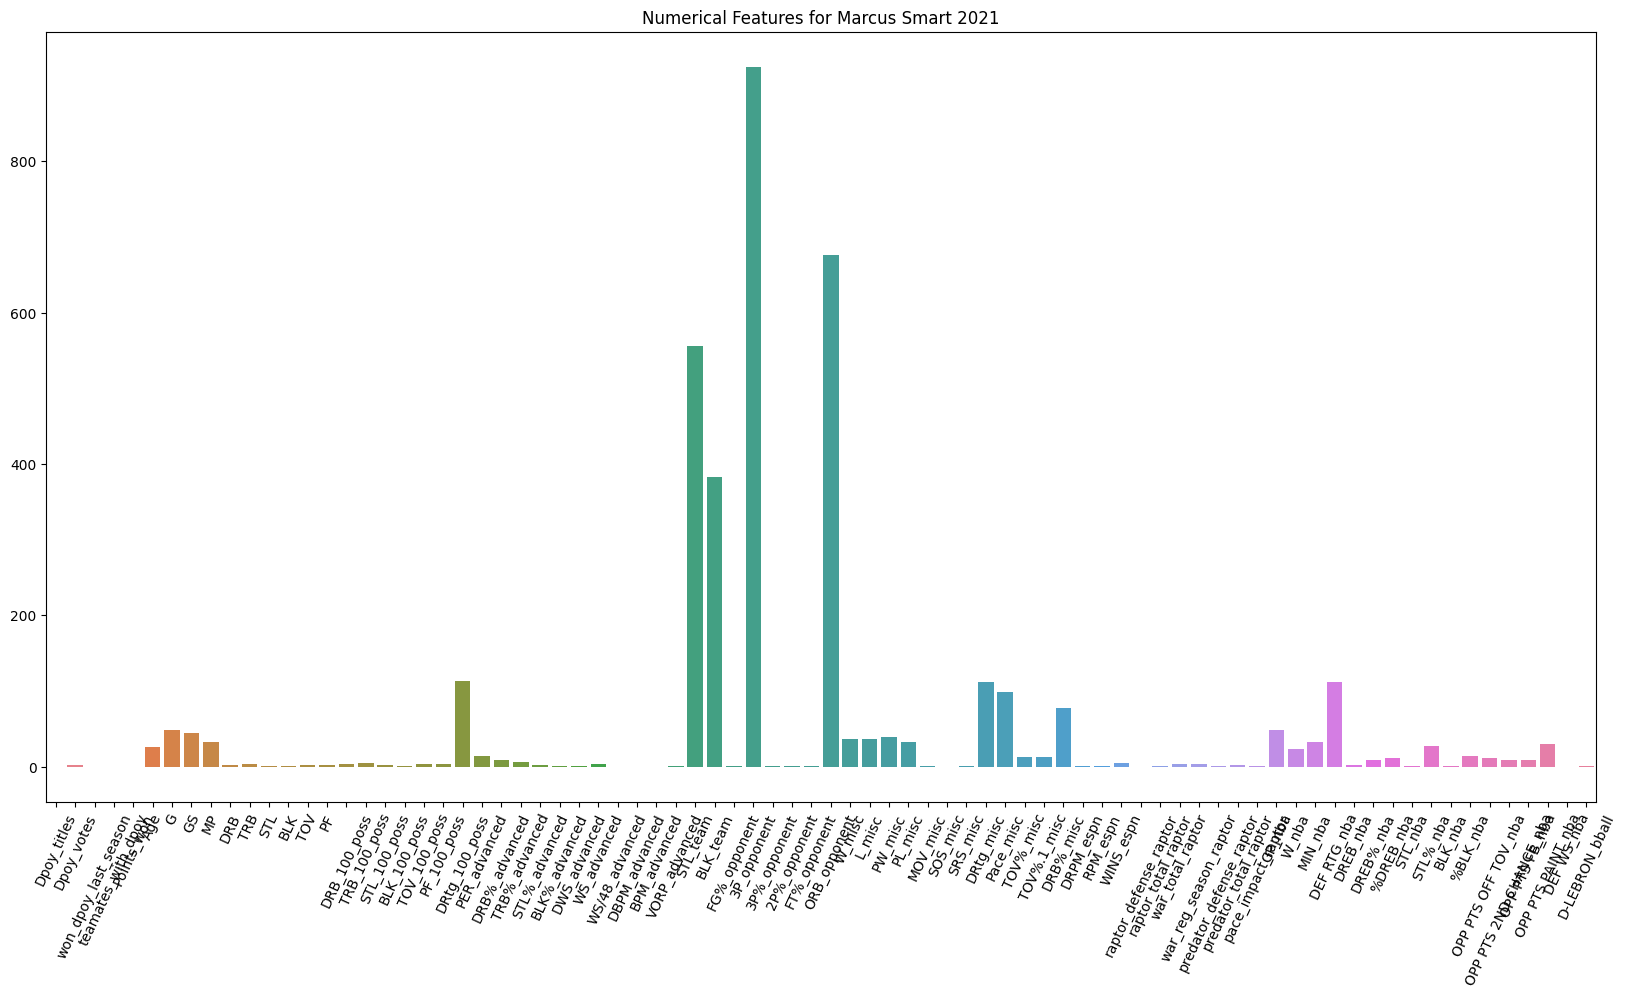

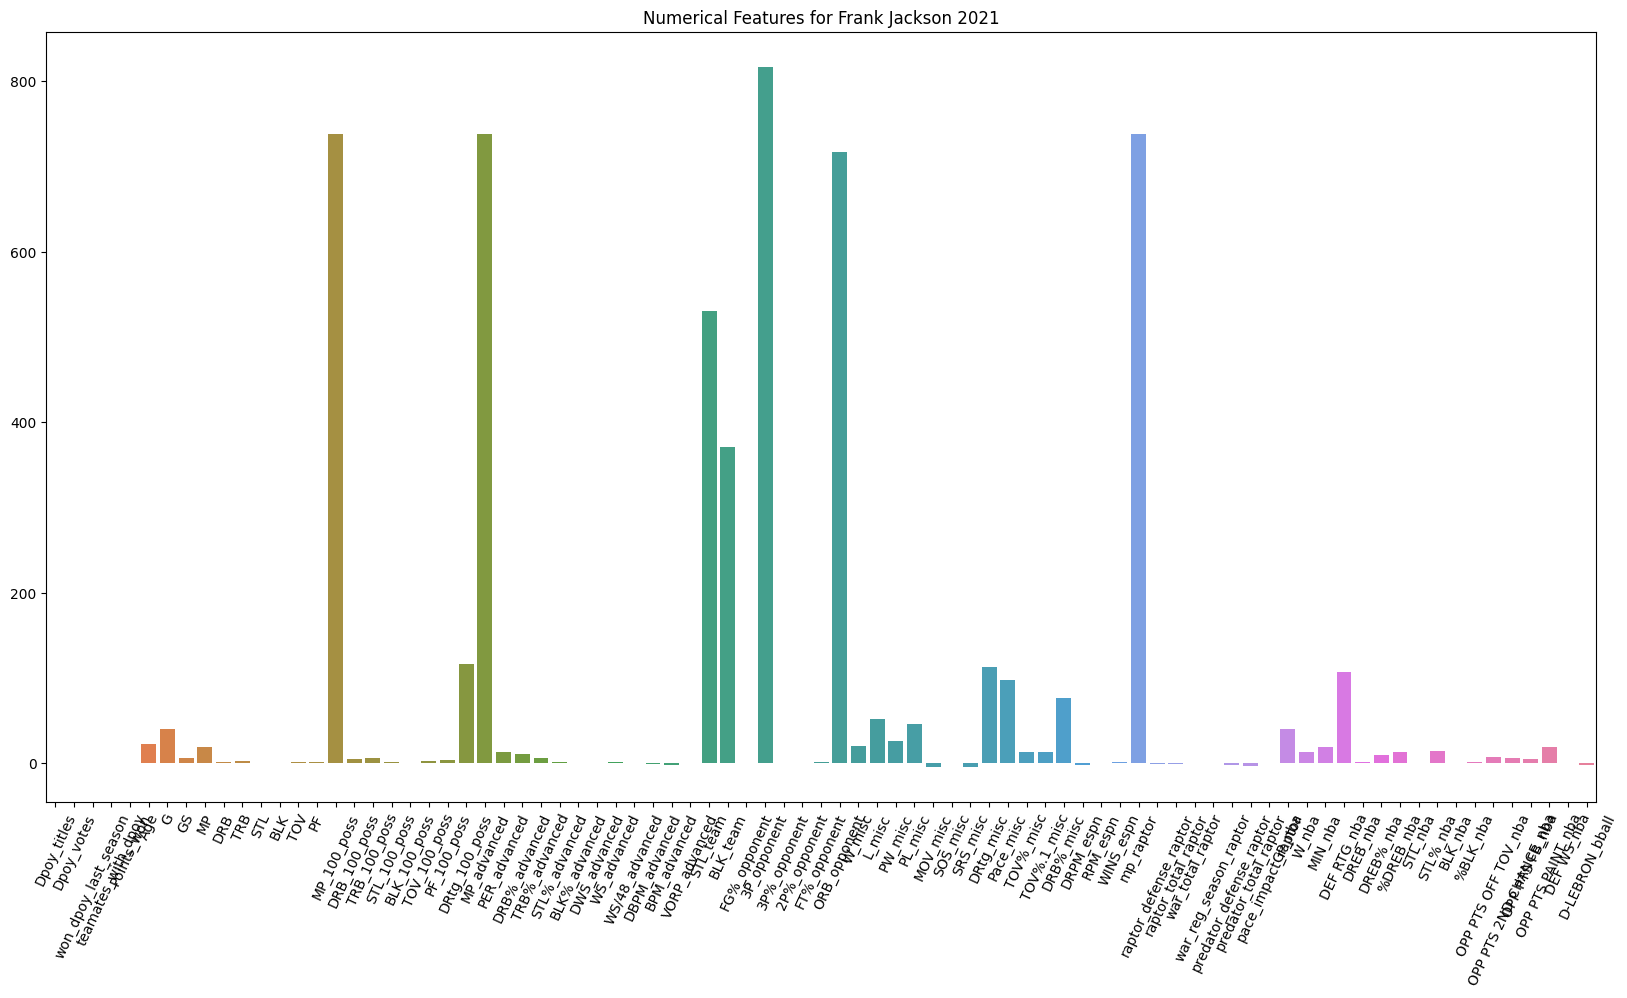

In [62]:
import seaborn as sns

# Plot all numerical features for Marcus Smart
plt.figure(figsize=(20, 10))
sns.barplot(data=marcus_data_numeric_filtered)
plt.title("Numerical Features for Marcus Smart 2021")
plt.xticks(rotation=65)
plt.show()

# Plot all numerical features for Frank Jackson
plt.figure(figsize=(20, 10))
sns.barplot(data=frank_data_numeric_filtered)
plt.title("Numerical Features for Frank Jackson 2021")
plt.xticks(rotation=65)
plt.show()

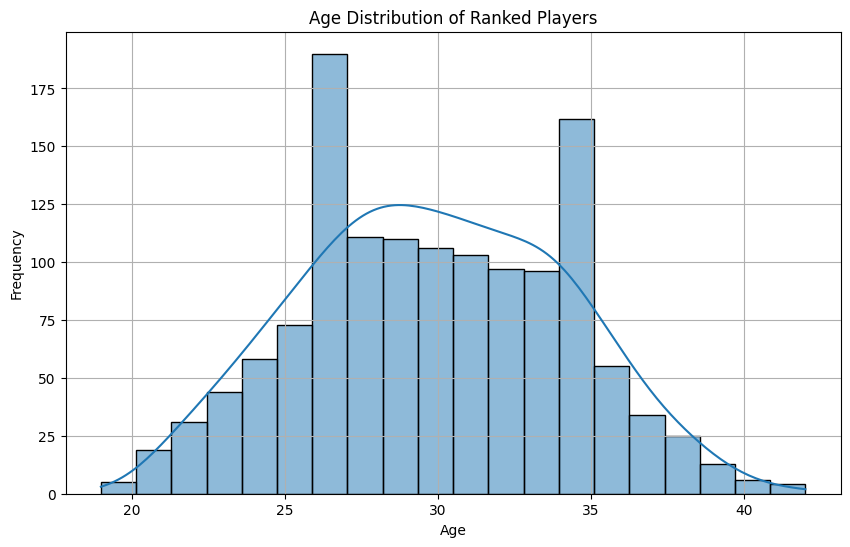

In [63]:
# Separate the ranked and non-ranked players
ranked_players = all_players_w_add_sorted[all_players_w_add_sorted['Rank'] != '-1.0']
non_ranked_players = all_players_w_add_sorted[all_players_w_add_sorted['Rank'] == '-1.0']

# Plot the age of the ranked players in a histogram
plt.figure(figsize=(10, 6))
sns.histplot(ranked_players['Age'], bins=20, kde=True)
plt.title('Age Distribution of Ranked Players')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()